In [67]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [53]:
net = cv.dnn.readNet("./Yolo/yolov3.weights", "./Yolo/yolov3.cfg")
classes = []
with open("./Yolo/categories.names", "r") as f:
    classes = f.read().splitlines()

### For Image

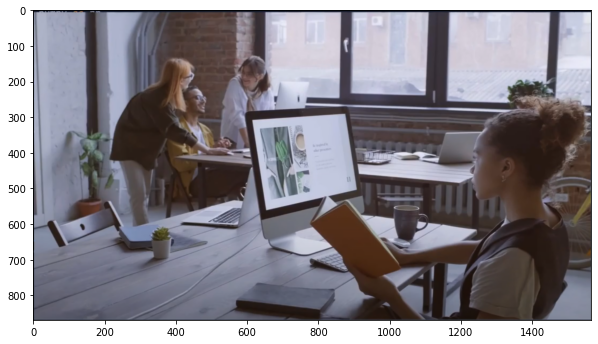

In [54]:
# For Image
img = cv.imread("./images/officeimage.png")
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
height, width, _ = img.shape

plt.figure(figsize=(10, 20))
plt.imshow(image)

In [55]:
blob = cv.dnn.blobFromImage(img, 1/225, (416, 416), (0, 0, 0), swapRB=True, crop=False)

# for b in blob:
#     for n, img_blob in enumerate(b):
#         cv.imshow(str(n), img_blob)
        
# cv.waitKey(0)
# cv.destroyAllWindows()

In [56]:
net.setInput(blob)
output_layer_names = net.getUnconnectedOutLayersNames()
layerOutput = net.forward(output_layer_names)

In [57]:
boxes = []
confidences = []
class_ids = []

for output in layerOutput:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence > 0.6:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
        

In [58]:
indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [59]:
font = cv.FONT_ITALIC
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

In [60]:
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i], 2))
    color = colors[i]
    cv.rectangle(img, (x, y), (x+w, y+h), color, 2)
    cv.putText(img, label+ " " + confidence, (x, y+20), font, 0.5, (255, 255, 255), 2)
    
cv.imshow("img",img)
cv.waitKey(0)
cv.destroyAllWindows()

### For Video

In [73]:
# @jit(nopython=False)
def objectDetection(path: str = "./Videos/People Walking in the Street  _ FREE STOCK FOOTAGE - NO COPYRIGHT.mp4"):
    cap = cv.VideoCapture(path)

    while cap.isOpened():
        _, frame = cap.read()
        height, width, _ = frame.shape

        blob = cv.dnn.blobFromImage(frame, 1/225, (416, 416), (0, 0, 0), swapRB=True, crop=False)

        net.setInput(blob)
        output_layer_names = net.getUnconnectedOutLayersNames()
        layerOutput = net.forward(output_layer_names)

        boxes = []
        confidences = []
        class_ids = []

        for output in layerOutput:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]

                if confidence > 0.6:
                    center_x = int(detection[0]*width)
                    center_y = int(detection[1]*height)
                    w = int(detection[2]*width)
                    h = int(detection[3]*height)

                    x = int(center_x - w/2)
                    y = int(center_y - h/2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

        font = cv.FONT_ITALIC
        colors = np.random.uniform(0, 255, size=(len(boxes), 3))

        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            color = colors[i]
            cv.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv.putText(frame, label+ " " + confidence, (x, y+20), font, 0.5, (255, 255, 255), 2)

        cv.imshow("frame", frame)
        if cv.waitKey(1) == ord("q"):
            break
    cap.release()
    cv.destroyAllWindows()

In [74]:
objectDetection()